# Preprocesamiento de Datos, Feature Engineering y Visualización

### Paso 1: Carga de Librerías y Creación de Datos de Ejemplo

Primero, importamos las librerías necesarias y creamos un DataFrame de ejemplo que contiene diferentes tipos de datos: numéricos, categóricos (nominales y ordinales) y fechas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la apariencia de los gráficos
sns.set_theme(style="whitegrid")

# Creación de datos de ejemplo
data = {
    'id_cliente': range(1, 11),
    'edad': [25, 34, 45, 23, 54, 32, 41, 28, 37, 49],
    'ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', 'Sevilla', 'Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Bilbao'],
    'nivel_satisfaccion': ['Bueno', 'Excelente', 'Regular', 'Bueno', 'Excelente', 'Regular', 'Bueno', 'Malo', 'Excelente', 'Bueno'],
    'ingresos_anuales': [50000, 75000, 60000, 48000, 95000, 52000, 82000, 41000, 91000, 78000],
    'fecha_registro': pd.to_datetime(['2022-01-10', '2021-03-15', '2022-05-20', '2023-01-05', '2020-11-30', '2022-08-12', '2021-06-25', '2023-02-18', '2020-09-01', '2022-12-05'])
}

df = pd.DataFrame(data)

print("Datos originales:")
df.head()

Datos originales:


,id_cliente,edad,ciudad,nivel_satisfaccion,ingresos_anuales,fecha_registro
0,1,25,Madrid,Bueno,50000,2022-01-10
1,2,34,Barcelona,Excelente,75000,2021-03-15
2,3,45,Valencia,Regular,60000,2022-05-20
3,4,23,Madrid,Bueno,48000,2023-01-05
4,5,54,Sevilla,Excelente,95000,2020-11-30


## 3.2. Codificación de Variables Categóricas

### Paso 2: Label Encoding

El **Label Encoding** asigna un número único a cada categoría. Es ideal para variables **ordinales**, donde el orden importa. Mostraremos dos métodos: manual (para control explícito del orden) y con `LabelEncoder` de Scikit-learn.

In [2]:
# Método 1: Manual (Recomendado para ordinales para garantizar el orden)
orden_satisfaccion = ['Malo', 'Regular', 'Bueno', 'Excelente']
mapeo = {categoria: i for i, categoria in enumerate(orden_satisfaccion)}
df['satisfaccion_manual'] = df['nivel_satisfaccion'].map(mapeo)

# Método 2: Usando LabelEncoder de Scikit-learn
# Nota: LabelEncoder asigna valores por orden alfabético, lo cual puede no ser correcto para variables ordinales.
le = LabelEncoder()
df['satisfaccion_le'] = le.fit_transform(df['nivel_satisfaccion'])

print("DataFrame con ambos tipos de Label Encoding:")
df[['nivel_satisfaccion', 'satisfaccion_manual', 'satisfaccion_le']]

DataFrame con ambos tipos de Label Encoding:


,nivel_satisfaccion,satisfaccion_manual,satisfaccion_le
0,Bueno,2,0
1,Excelente,3,1
2,Regular,1,3
3,Bueno,2,0
4,Excelente,3,1
5,Regular,1,3
6,Bueno,2,0
7,Malo,0,2
8,Excelente,3,1
9,Bueno,2,0


### Paso 3: One-Hot Encoding

El **One-Hot Encoding** crea nuevas columnas binarias para cada categoría. Es ideal para variables **nominales** donde no hay un orden, como la `ciudad`. Mostraremos el método de Pandas (`get_dummies`) y el de Scikit-learn (`OneHotEncoder`).

In [3]:
# Método 1: Pandas get_dummies (más directo y sencillo)
df_one_hot_pd = pd.get_dummies(df, columns=['ciudad'], prefix='ciudad')
print("--- One-Hot Encoding con Pandas get_dummies ---")
print(df_one_hot_pd.head())

# Método 2: Scikit-learn OneHotEncoder (más robusto para pipelines de Machine Learning)
ohe = OneHotEncoder(sparse_output=False)
# El encoder espera un array 2D, por eso usamos [['ciudad']]
ciudad_encoded = ohe.fit_transform(df[['ciudad']])
# Creamos un DataFrame con los resultados
df_ohe_sklearn = pd.DataFrame(ciudad_encoded, columns=ohe.get_feature_names_out(['ciudad']))
# Unimos este nuevo DataFrame con el original
df_final_ohe = df.join(df_ohe_sklearn)
print("\n--- One-Hot Encoding con Scikit-learn OneHotEncoder ---")
print(df_final_ohe.head())

--- One-Hot Encoding con Pandas get_dummies ---
   id_cliente  edad nivel_satisfaccion  ingresos_anuales fecha_registro  \
0           1    25              Bueno             50000     2022-01-10   
1           2    34          Excelente             75000     2021-03-15   
2           3    45            Regular             60000     2022-05-20   
3           4    23              Bueno             48000     2023-01-05   
4           5    54          Excelente             95000     2020-11-30   

   satisfaccion_manual  satisfaccion_le  ciudad_Barcelona  ciudad_Bilbao  \
0                    2                0             False          False   
1                    3                1              True          False   
2                    1                3             False          False   
3                    2                0             False          False   
4                    3                1             False          False   

   ciudad_Madrid  ciudad_Sevilla  ciudad_Val

## 3.3. Discretización (Binning)

### Paso 4: Discretización de la Edad

Agrupamos la `edad` en categorías como 'Joven', 'Adulto' y 'Senior'.

In [4]:
bins_edad = [0, 30, 50, 100]
labels_edad = ['Joven', 'Adulto', 'Senior']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins_edad, labels=labels_edad, right=False)
print(df[['id_cliente', 'edad', 'grupo_edad']])

   id_cliente  edad grupo_edad
0           1    25      Joven
1           2    34     Adulto
2           3    45     Adulto
3           4    23      Joven
4           5    54     Senior
5           6    32     Adulto
6           7    41     Adulto
7           8    28      Joven
8           9    37     Adulto
9          10    49     Adulto


## 4. Ingeniería de Características (Feature Engineering)

### Paso 5: Creación y Extracción de Nuevas Variables

Generamos nuevas características a partir de las existentes, como la relación `ingreso/edad` y extrayendo componentes de la `fecha_registro`.

In [5]:
# Creación de nueva variable
df['ingreso_por_edad'] = df['ingresos_anuales'] / df['edad']

# Extracción de características de fechas
df['año_registro'] = df['fecha_registro'].dt.year
df['mes_registro'] = df['fecha_registro'].dt.month
df['dia_semana_registro'] = df['fecha_registro'].dt.day_name()

print(df[['id_cliente', 'ingreso_por_edad', 'año_registro', 'mes_registro']].head())

   id_cliente  ingreso_por_edad  año_registro  mes_registro
0           1       2000.000000          2022             1
1           2       2205.882353          2021             3
2           3       1333.333333          2022             5
3           4       2086.956522          2023             1
4           5       1759.259259          2020            11


## 5. Manipulación Avanzada con Pandas

### Paso 6: Uso de `apply()`, `map()` y `transform()`

In [6]:
# apply(): Clasificar ingresos
def clasificar_ingresos(ingreso):
    if ingreso < 50000: return 'Bajo'
    elif 50000 <= ingreso < 80000: return 'Medio'
    else: return 'Alto'
df['categoria_ingreso'] = df['ingresos_anuales'].apply(clasificar_ingresos)

# transform(): Calcular el ingreso promedio por ciudad y añadirlo como columna
df['ingreso_promedio_ciudad'] = df.groupby('ciudad')['ingresos_anuales'].transform('mean')

print(df[['ciudad', 'ingresos_anuales', 'categoria_ingreso', 'ingreso_promedio_ciudad']].head())

      ciudad  ingresos_anuales categoria_ingreso  ingreso_promedio_ciudad
0     Madrid             50000             Medio                  60000.0
1  Barcelona             75000             Medio                  63500.0
2   Valencia             60000             Medio                  50500.0
3     Madrid             48000              Bajo                  60000.0
4    Sevilla             95000              Alto                  93000.0


### Paso 7: Agregación con `groupby()`

In [7]:
resumen_ciudad = df.groupby('ciudad').agg(
    ingreso_promedio=('ingresos_anuales', 'mean'),
    edad_maxima=('edad', 'max'),
    conteo_clientes=('id_cliente', 'count')
).reset_index()

print(resumen_ciudad)

      ciudad  ingreso_promedio  edad_maxima  conteo_clientes
0  Barcelona           63500.0           34                2
1     Bilbao           78000.0           49                1
2     Madrid           60000.0           41                3
3    Sevilla           93000.0           54                2
4   Valencia           50500.0           45                2


### Paso 8: Combinación de DataFrames (`merge`)

In [8]:
df_productos = pd.DataFrame({
    'id_cliente': [1, 3, 5, 7, 9],
    'producto_comprado': ['Laptop', 'Monitor', 'Teclado', 'Mouse', 'Webcam']
})

df_final = pd.merge(df, df_productos, on='id_cliente', how='left')
print(df_final[['id_cliente', 'ciudad', 'producto_comprado']].head())

   id_cliente     ciudad producto_comprado
0           1     Madrid            Laptop
1           2  Barcelona               NaN
2           3   Valencia           Monitor
3           4     Madrid               NaN
4           5    Sevilla           Teclado


# Fundamentos de la Visualización de Datos

### 1.1. Introducción a la Visualización
- **Rol en el Análisis de Datos:** La visualización es crucial para transformar datos crudos en insights comprensibles. Se utiliza en todo el ciclo de vida, desde la limpieza y exploración inicial hasta la comunicación final de resultados.
- **Exploración vs. Explicación:**
  - **Exploración:** Para *nosotros* (analistas). El objetivo es descubrir patrones, anomalías, relaciones y entender la estructura de los datos. Los gráficos pueden ser rápidos y complejos.
  - **Explicación:** Para *otros* (audiencia). El objetivo es comunicar hallazgos de manera clara y convincente. Los gráficos deben ser simples, directos y contar una historia.

### 1.2. Principios de un Gráfico Efectivo
- **Claridad y Simplicidad:** Menos es más. Elimina cualquier elemento que no aporte información (ruido o *chart junk*). El foco debe estar en los datos.
- **Elección del Gráfico Correcto:** La elección depende de lo que quieras mostrar: 
  - **Comparación:** Barras.
  - **Relación:** Dispersión.
  - **Distribución:** Histograma, Boxplot.
  - **Composición:** Tarta (con moderación), Barras apiladas.
  - **Evolución en el tiempo:** Líneas.
- **Integridad Visual:** No mientas con los datos. Asegúrate de que el eje Y comience en cero para gráficos de barras y evita escalas logarítmicas si no son necesarias y no se explican.

### 1.3. Anatomía de un Gráfico
Un gráfico se compone de: **Título** (¿Qué es?), **Ejes X/Y** (¿Qué se mide?), **Etiquetas de los ejes**, **Marcas** (barras, puntos, líneas), **Leyenda** (si hay múltiples series) y **Fuente de los datos**.

### 1.4. Ecosistema de Visualización en Python
- **Matplotlib:** La base de todo. Ofrece un control total sobre cada elemento del gráfico (bajo nivel), pero puede ser verboso.
- **Seaborn:** Construida sobre Matplotlib. Simplifica la creación de gráficos estadísticos complejos y atractivos (alto nivel) y se integra perfectamente con Pandas.
- **Plotly:** Ideal para gráficos interactivos (zoom, hover) que se pueden integrar en páginas web y dashboards.

## 2. Visualización Estática con Matplotlib y Seaborn

### Paso 9: Visualización con Matplotlib y Seaborn

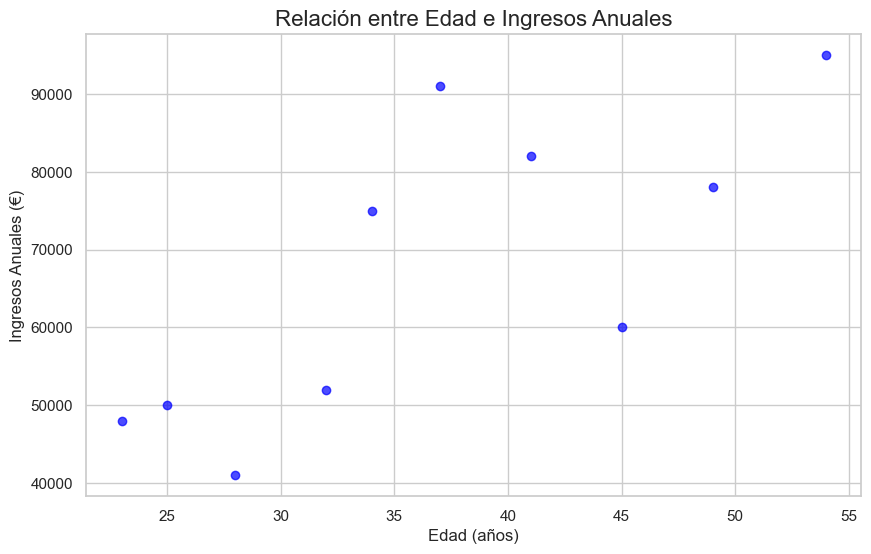

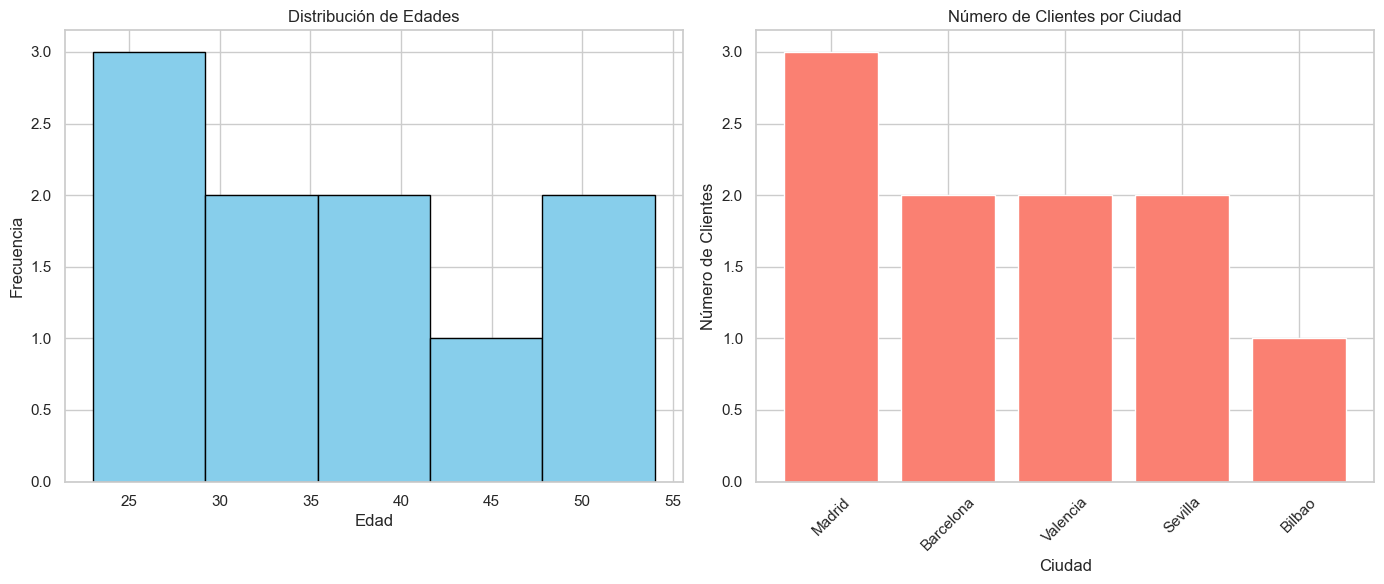

In [9]:
# --- 2.1. Matplotlib: El Control Total ---
# La interfaz orientada a objetos (fig, ax) es la más recomendada.
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión (scatter) para ver la relación entre edad e ingresos
ax.scatter(df['edad'], df['ingresos_anuales'], color='blue', alpha=0.7)

# Personalización avanzada
ax.set_title('Relación entre Edad e Ingresos Anuales', fontsize=16)
ax.set_xlabel('Edad (años)', fontsize=12)
ax.set_ylabel('Ingresos Anuales (€)', fontsize=12)
ax.grid(True)

plt.show()

# --- Manejo de múltiples gráficos con subplots() ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de edades
ax1.hist(df['edad'], bins=5, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de Edades')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia')

# Gráfico de barras de conteo por ciudad
conteo_ciudad = df['ciudad'].value_counts()
ax2.bar(conteo_ciudad.index, conteo_ciudad.values, color='salmon')
ax2.set_title('Número de Clientes por Ciudad')
ax2.set_xlabel('Ciudad')
ax2.set_ylabel('Número de Clientes')
plt.xticks(rotation=45)

plt.tight_layout() # Ajusta el espaciado
plt.show()

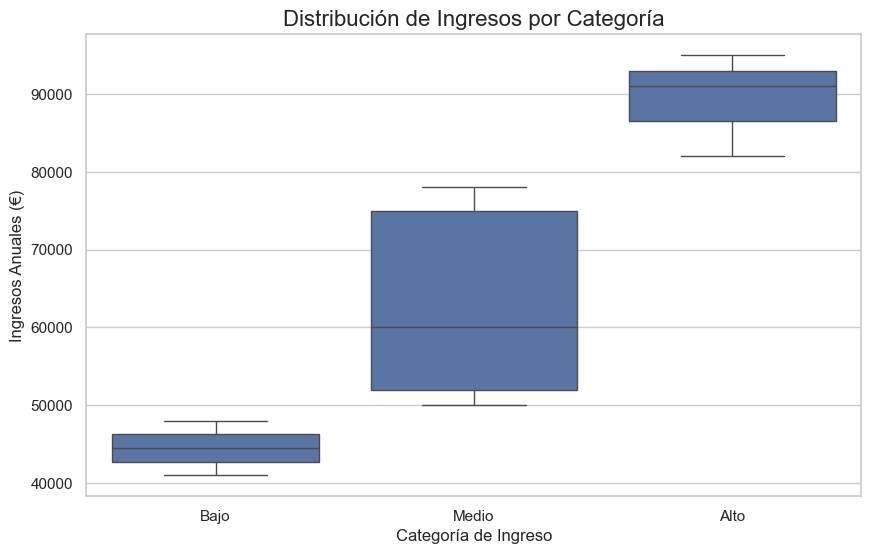

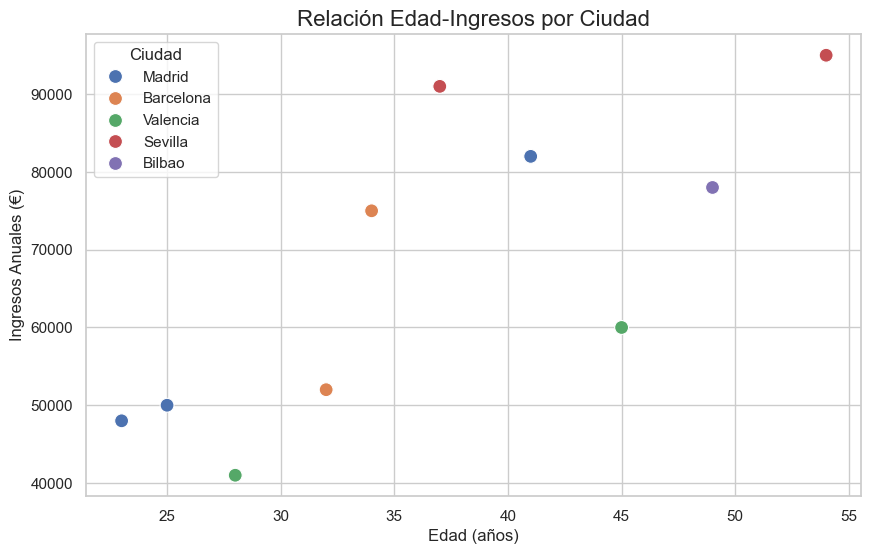

C:\Users\DELL\AppData\Local\Temp\ipykernel_14748\63198690.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ciudad', palette='viridis')


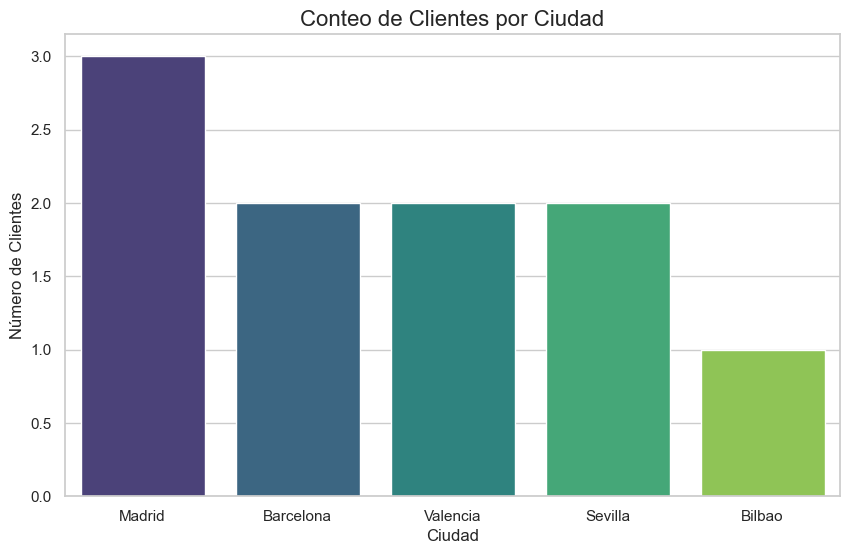

In [10]:
# --- 2.2. Seaborn: La Elegancia Estadística ---

# Visualización de Distribuciones: Boxplot para ver ingresos por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='categoria_ingreso', y='ingresos_anuales', data=df, order=['Bajo', 'Medio', 'Alto'])
plt.title('Distribución de Ingresos por Categoría', fontsize=16)
plt.xlabel('Categoría de Ingreso', fontsize=12)
plt.ylabel('Ingresos Anuales (€)', fontsize=12)
plt.show()

# Visualización de Relaciones: Scatterplot mejorado con 'hue' para añadir una dimensión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='edad', y='ingresos_anuales', hue='ciudad', s=100) # s=100 para tamaño de punto
plt.title('Relación Edad-Ingresos por Ciudad', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Ingresos Anuales (€)', fontsize=12)
plt.legend(title='Ciudad')
plt.show()

# Visualización de Datos Categóricos: Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ciudad', palette='viridis')
plt.title('Conteo de Clientes por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

### Paso 10: Matriz de Correlación con Heatmap

Un heatmap es excelente para visualizar la correlación entre variables numéricas. Nos ayuda a identificar rápidamente qué variables están relacionadas entre sí.

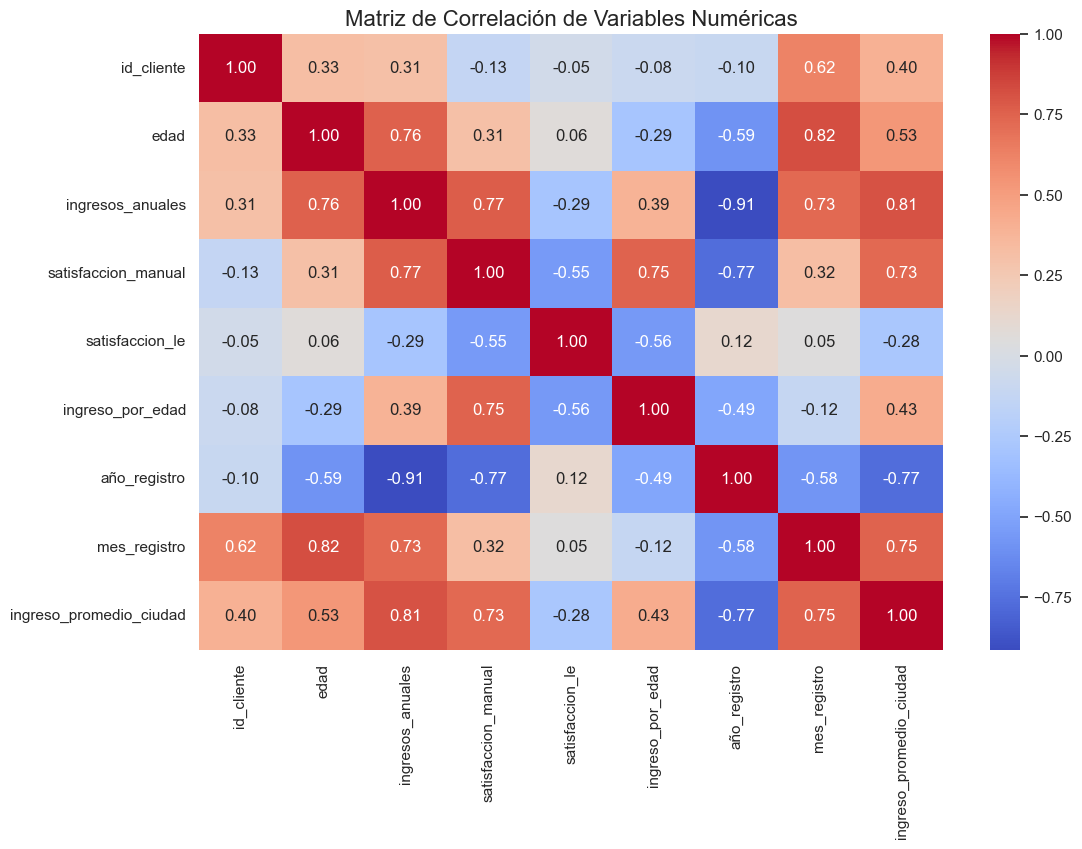

In [11]:
# Seleccionamos solo las columnas numéricas para la correlación
df_numeric = df.select_dtypes(include=np.number)

# Calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()

# Creamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

## 5 Puntos Clave sobre Visualización de Datos

1.  **Define tu Propósito (Exploración vs. Explicación):** Antes de crear cualquier gráfico, pregúntate si es para descubrir insights para ti (exploración) o para comunicar un mensaje claro a una audiencia (explicación). Esto definirá el nivel de simplicidad y anotaciones necesarias.

2.  **Elige el Gráfico Adecuado para la Tarea:** No todos los gráficos sirven para todo. Asocia tu objetivo (comparar, ver relación, distribución, composición) con el tipo de gráfico correcto (barras, dispersión, histograma, etc.) para que el mensaje sea efectivo.

3.  **La Simplicidad es Poder:** Un buen gráfico es aquel que se entiende rápidamente. Elimina todo lo que no sea esencial (ruido, bordes innecesarios, colores estridentes) y enfoca la atención en los datos para maximizar la claridad.

4.  **Usa Seaborn para la Eficiencia y Matplotlib para el Control:** Empieza con Seaborn para crear rápidamente gráficos estadísticos elegantes y complejos con poco código. Cuando necesites un control granular sobre cada detalle (posiciones, anotaciones específicas), utiliza la interfaz orientada a objetos de Matplotlib (`fig`, `ax`).

5.  **Un Gráfico sin Contexto no Dice Nada:** Siempre incluye títulos claros, etiquetas en los ejes (con unidades si es necesario) y leyendas. Un gráfico debe ser autoexplicativo y contar una historia completa por sí mismo sin necesidad de que el lector revise el texto o el código.